# 1.2 Non-linear regression

In [66]:
%matplotlib inline
import warnings;warnings.filterwarnings('ignore');import matplotlib.pyplot as plt;import numpy as np;import pandas as pd;import seaborn as sns;sns.set_context("notebook", font_scale=1.4);sns.set_style("whitegrid");import imp;compomics_import = imp.load_source('compomics_import', '../compomics_import.py');from IPython.core.display import HTML;css_file = '../my.css';HTML(open(css_file, "r").read())

Linear regression models the data as

$$f(x,\theta)=\theta_0x_0 + \theta_1x_1 + \theta_2x_2+...+\theta_mx_m = \theta^{\prime} x,$$

where $m$ is the number of features in the data set. For $m=1$ this becomes

$$f(x,\theta)=\theta_0x_0 + \theta_1x_1.$$

This model represents a linear relationship between the dependent and the independent variable, i.e. we assumed the true relationship was linear. 

Suppose we know the relation is not linear. What other assumptions can we make? Most **non-linear relationships** can be modeled as an **$n^{th}$-degree polynomial function** whereby the amount of flexibility of the model is determined by its **degree**. 

A polynomial model of degree 2 is formalized as follows:

$$f(x,\theta)=\theta_0x_0 + \theta_1x_1 + \theta_2x_1^2.$$

The non-linearity is obtained by adding a term for the square of $x_1$ that is controlled by a new model parameter $\theta_2$. 

Let's consider the following data set:

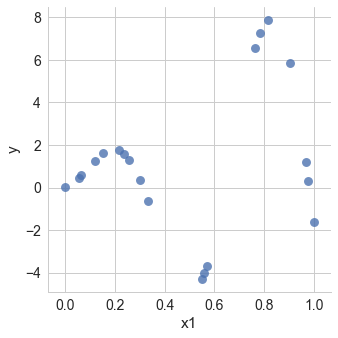

In [67]:
dataset = pd.read_csv("nonlinear.csv")
sns.lmplot(x="x1", y="y", data=dataset, fit_reg=False, size=5, scatter_kws={"s": 80})
plt.show()

We can see that we should not assume a linear relationship between feature $x_1$ and target $y$. Instead we need a much more flexible curve to fit this data. 

First we will consider modeling the data using a polynomial model of degree 2. To find the optimal values for $\theta_0$, $\theta_1$ and $\theta_2$ we can again apply the gradient descent algorithm to optimize the model parameters $\theta_0$, $\theta_1$ and $\theta_2$. 

Let's add the feature $x_1^2$ to the data set:

In [68]:
dataset['x1^2'] = dataset['x1']**2
print "New dataset:"
print dataset.head()

New dataset:
         x1         y      x1^2
0  0.000000  0.040535  0.000000
1  0.053763  0.459320  0.002891
2  0.064516  0.584212  0.004162
3  0.118280  1.269782  0.013990
4  0.150538  1.614499  0.022662


We can plot the new feature against $x_1$:

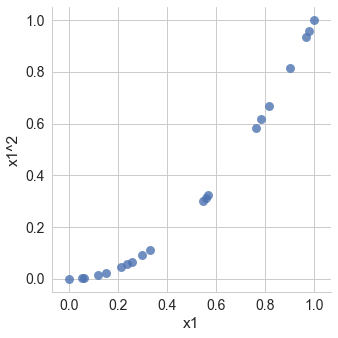

In [69]:
sns.lmplot(x="x1", y="x1^2", data=dataset,
           fit_reg=False, size=5, scatter_kws={"s": 80})
plt.show()

The plot shows how the added polynomial feature $x_1^2$ relates non-linearly to $x_1$. 

We can now try to fit a linear model to this augmented data set using the scikit-learn `LinearRegession` module that computes the optimal linear fit directly:

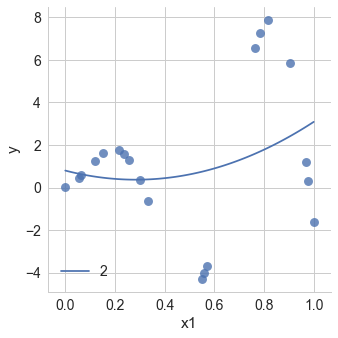

In [70]:
from sklearn.linear_model import LinearRegression

sns.lmplot(x="x1", y="y", data=dataset,
           fit_reg=False, size=5, scatter_kws={"s": 80})

X = dataset.copy()
y = X.pop('y')

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

x_plot = np.linspace(0,1, 100)
plt.plot(x_plot,model.intercept_ + model.coef_[0]*x_plot + model.coef_[1]*((x_plot)**2),label="2")
plt.legend(loc='lower left')
plt.show()

This still doesn't look like a good fit for the data points. 

We can try to fit higher order polynomials:

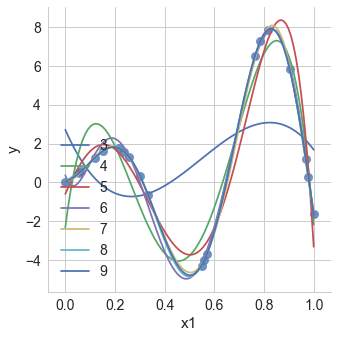

In [73]:
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler()

sns.lmplot(x="x1", y="y", data=dataset,
           fit_reg=False, size=5, scatter_kws={"s": 80})

model = LinearRegression(fit_intercept=True)
x_plot = np.linspace(0, 1, 100)

X = dataset.copy()
y = X.pop('y')  

for degree in [3, 4, 5, 6, 7, 8, 9]:
    X['x1^'+str(degree)] = X['x1']**degree        
    #transformed feature are at different scale!!!
    X['x1^'+str(degree)] = feature_scaler.fit_transform(X[ ['x1^'+str(degree)]])

    model.fit(X, y)
    
    pred = model.intercept_
    for i in range(degree):
        pred += model.coef_[i]*((x_plot)**(i+1))
    plt.plot(x_plot,pred,label="%d" % degree)
plt.legend(loc='lower left')
plt.show()

The plot shows how a polynomial of degree 9 fits the data set very well.

Besides the linear and polynomial models we can use regression to fit many more types of relationships. Let's look at a typical relationship between the dose of a drug and the response to the drug (**dose-response-relationship**). 


![dose response](dose_response.jpg)


This plot shows a typical sigmoidal nature of such a dose–response curve. The curve plots the percentage of flies that are anesthetized at 75 s (mean ± SEM; triangles) plotted versus the dose of isoflurane anesthesia given (Gadagkara & Callb). These types of relationships are typically modeled with a **sigmoid function** (or **logistic function**)

$$f(x)=\frac{1}{1+e^{-(\theta_0+\theta_1x)}},$$

where $f(x)$ is the expected response at dosage $x$, $\theta_1$ is the slope at the steepest part of the curve and $\theta_0$ is the dosage at which 50% of the subjects are expected to show the desired response. Just as with the linear function $f(x)=\theta_0+\theta_1x$ we need to find the values for $\theta_1$ and $\theta_0$ that minimize  the sum of squares of the given data. 